Initial Cost is: 0.6931471805599441 



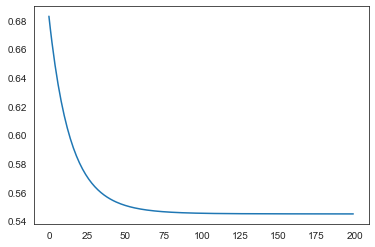

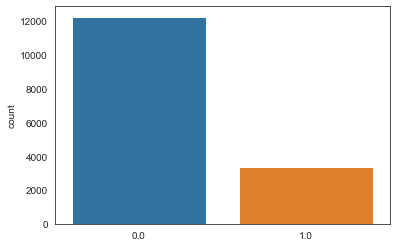

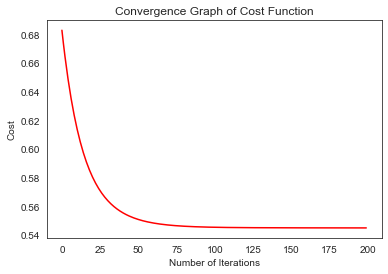

Final Cost is: 0.544956238807869 

Accuracy = 78.32757959340238


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random
# sigmoidal function definition
def sigmoid(x):
    return 1/(1+np.exp(-x))

def getAccuracy(test_dataset, predictions):
    correct = 0
    for i in range(len(test_dataset)):
        if test_dataset[i] == predictions[i]:
            correct += 1
    return (correct/float(len(test_dataset))) * 100.0

def split_dataset (dataset ,split_ratio): # numpy
    training_set = []
    training_size = int(len(dataset)*split_ratio)
    temp_test_dataset = list(dataset)
    random_row_number = 0
    random_row = []
    while (len(training_set)<training_size):
        random_row_number = random.randrange(len(temp_test_dataset))
        random_row = temp_test_dataset.pop(random_row_number)
        training_set.append(random_row)
    test_dataset = temp_test_dataset
    return [training_set, test_dataset]


# cant be done analytically therefore we use gradient descent
# applying gradient descent on the cost function so that on the iterations it goes to the global minima of cost function
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations,)

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
#         if (math.isnan(cost_history[i])!=True):
#             print(cost_history[i])
    
    return (cost_history, params)
    
def predict(X, params):
    return np.round(sigmoid(X @ params))
    
    
def compute_cost(X, y, param):
    m = len(y)
    h = sigmoid(X @ param)
    cost = (1/m)*(((-y).T @ np.log(h))-((1-y).T @ np.log(1-h )))
    return cost
    
# we need to find optimal params and substitute in the above function 
# to get the y_pred


orig_dataset = pd.read_csv("RainInAustralia.csv")

#sns.countplot(x="workingday", data=dailyData)


new_dataset = np.array(orig_dataset)

split_ratio = 0.89

training_set, test_dataset = split_dataset(new_dataset, split_ratio)

training_set = np.array(training_set)
test_dataset = np.array(test_dataset)


Xtrain = training_set[:,:-1].copy()
ytrain = training_set[:,-1].copy()

Xtest = test_dataset[:,:-1].copy()
ytest = test_dataset[:,-1].copy()

m = len(ytrain)
n = np.size(Xtrain,1)
params = np.zeros(n,)
iterations = 200

# change from 0.0000008 to 0.0000059 and show the variations of the cost plot
learning_rate = 0.00000008 # working for this

initial_cost = compute_cost(Xtrain, ytrain, params)
print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(Xtrain, ytrain, params, learning_rate, iterations)

ytestpred = predict(Xtest, params_optimal)

plt.plot(cost_history)
plt.show()


r2_error = (ytest-ytestpred)**2
sns.countplot(r2_error)

plt.show()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()
plt.show()
final_cost = compute_cost(Xtrain, ytrain, params_optimal)
print("Final Cost is: {} \n".format(final_cost))

print("Accuracy = " + str( getAccuracy(ytest, ytestpred)))